# FINDING MISSING VALUES WITH LOGISTIC REGRESSION

### Importing  Data Preprocessing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Importing

In [7]:
data = pd.read_csv(r"C:\Users\SMART TECH\Desktop\AppliedNLPMaterial-master\Airline.csv")
data


,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


#### Data Exploration

In [8]:
data.head(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Female,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Male,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Female,Loyal Customer,56,Personal Travel,Business,73,0,0,0,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Male,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,...,2,2,2,4,5,3,4,2,30,26.0


In [13]:
# All columns in the dataset
print(data.columns)

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [12]:
print(data.describe())

                 Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000     

# Data Preprocessing

#### Dealing with missing values


In [14]:
data.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [18]:
#checking data type
data['Arrival Delay in Minutes'].dtype

dtype('float64')

<Axes: xlabel='Arrival Delay in Minutes'>

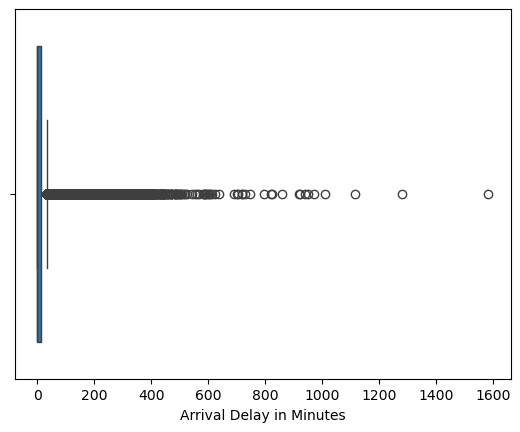

In [20]:
sns.boxplot(x=data['Arrival Delay in Minutes'])


In [22]:
# As, there are a lot of outliers, we will use median for this

In [24]:
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median())

data.isnull().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

# fix outliers in the dataset

### Step 1: Detect Outliers using IQR

In [30]:

# Select numerical columns only
def check_outliers(df):
    outliers = {}
    # Apply IQR method for outlier detection and capping
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
       
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_data = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outlier_data.empty:
            outliers[column] = outlier_data.shape[0] 
    
    return outliers


In [34]:
print(check_outliers(data))

{'Flight Distance': 2581, 'On-board service': 13270, 'Checkin service': 15370, 'Departure Delay in Minutes': 18098, 'Arrival Delay in Minutes': 17492}


<Axes: xlabel='Flight Distance'>

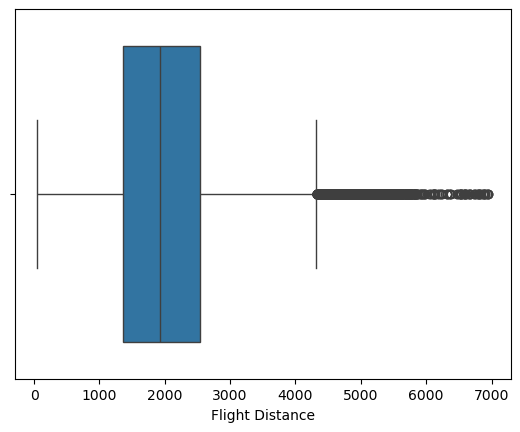

In [36]:
sns.boxplot(x=data['Flight Distance'])

<Axes: xlabel='On-board service'>

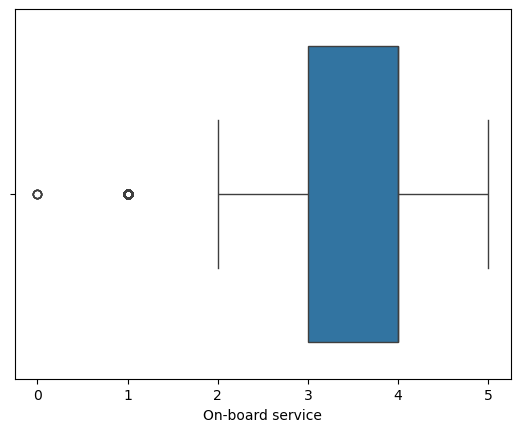

In [38]:
sns.boxplot(x=data['On-board service'])

<Axes: xlabel='Checkin service'>

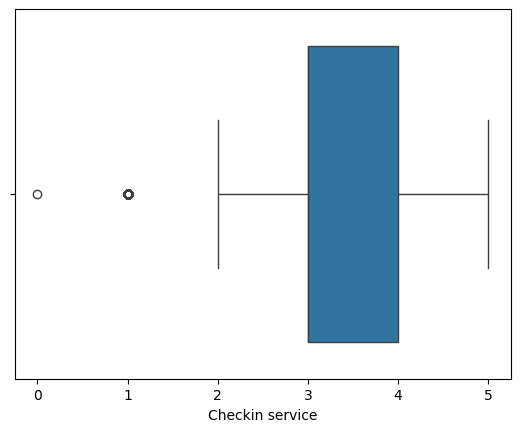

In [40]:
#checking for outliers
sns.boxplot(x=data['Checkin service'])

<Axes: xlabel='Departure Delay in Minutes'>

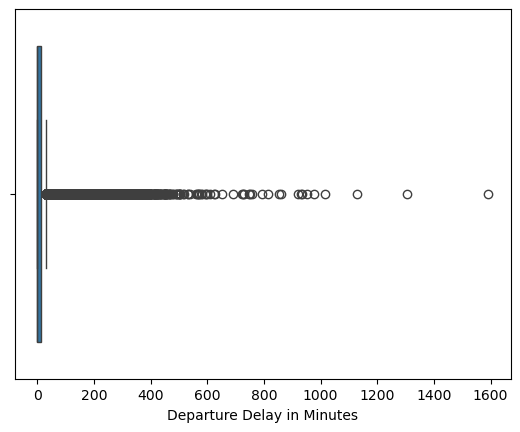

In [42]:
#checking for outliers
sns.boxplot(x=data['Departure Delay in Minutes'])sns.boxplot(x=data['Arrival Delay in Minutes'])

<Axes: xlabel='Arrival Delay in Minutes'>

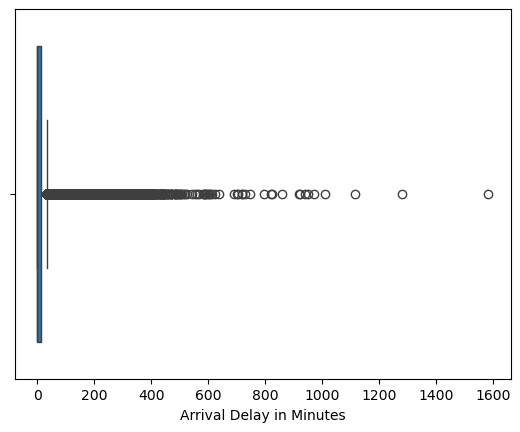

In [44]:
sns.boxplot(x=data['Arrival Delay in Minutes'])

# Checking for Custoemr Ratings

In [47]:
data['On-board service'].unique()

array([3, 4, 1, 2, 5, 0], dtype=int64)

In [49]:
data['Checkin service'].unique()

array([5, 2, 4, 3, 1, 0], dtype=int64)

#### 'On-board service' and 'Checkin service' columns represents rating given by the customers, we will not consider the outliers of these columns as they are important indicators for our dataset

In [59]:
### Flight Distances Outlier Remover

In [65]:
# Capping to the 95th percentile for Flight Distance
upper_limit = data['Flight Distance'].quantile(0.95)
data['Flight Distance'] = data['Flight Distance'].clip(upper=upper_limit)


<Axes: xlabel='Flight Distance'>

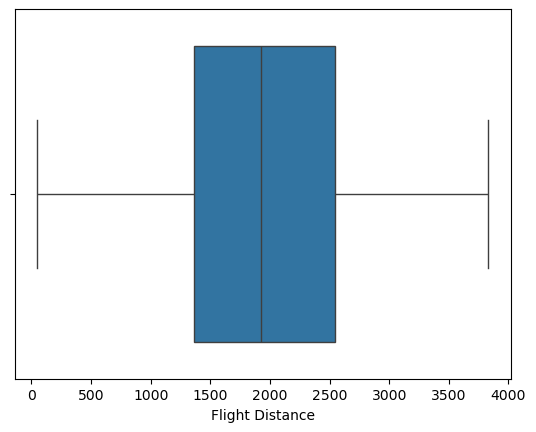

In [67]:
sns.boxplot(x=data['Flight Distance'])

In [69]:
# Adding a small constant to avoid taking log(0) or log(negative values)
data['Departure Delay in Minutes'] = np.log1p(data['Departure Delay in Minutes'])  
data['Arrival Delay in Minutes'] = np.log1p(data['Arrival Delay in Minutes'])   

<Axes: xlabel='Departure Delay in Minutes'>

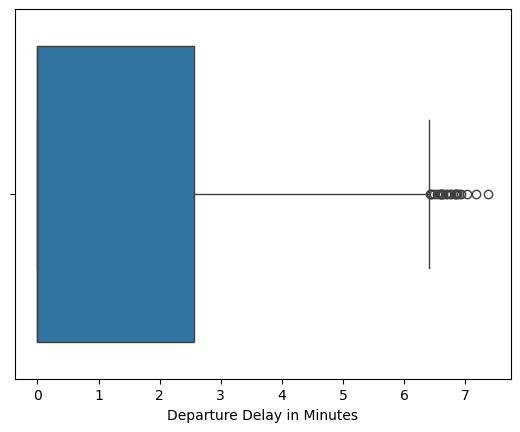

In [71]:
sns.boxplot(x=data['Departure Delay in Minutes'])

<Axes: xlabel='Arrival Delay in Minutes'>

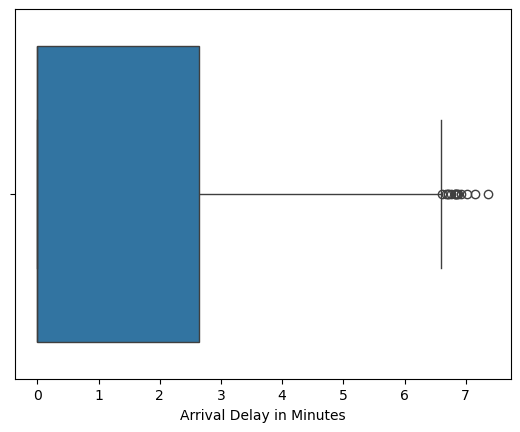

In [73]:
sns.boxplot(x=data['Arrival Delay in Minutes'])

In [75]:
check_outliers(data)

{'On-board service': 13270,
 'Checkin service': 15370,
 'Departure Delay in Minutes': 24,
 'Arrival Delay in Minutes': 14}

In [77]:
# Now we have to remove these 14 rows in the Arrival as services dont need any change

In [81]:
Q1 = data['Arrival Delay in Minutes'].quantile(0.25)
Q3 = data['Arrival Delay in Minutes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where the 'Arrival Delay in Minutes' is outside the bounds
data = data[(data['Arrival Delay in Minutes'] >= lower_bound) & (data['Arrival Delay in Minutes'] <= upper_bound)]


<Axes: xlabel='Arrival Delay in Minutes'>

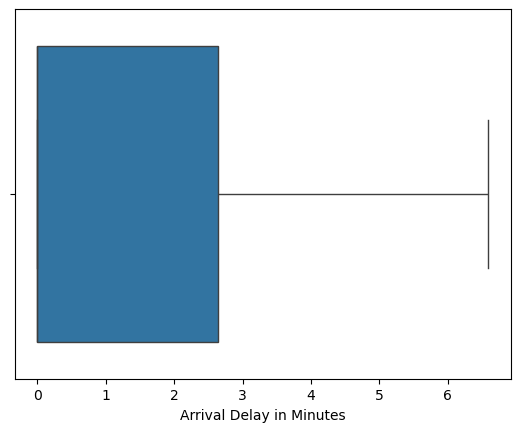

In [83]:
sns.boxplot(x=data['Arrival Delay in Minutes'])

In [85]:
check_outliers(data)

{'On-board service': 13268,
 'Checkin service': 15367,
 'Departure Delay in Minutes': 10}

<Axes: xlabel='Departure Delay in Minutes'>

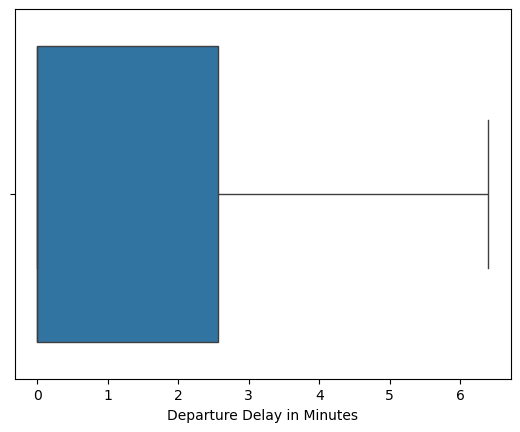

In [87]:
Q1 = data['Departure Delay in Minutes'].quantile(0.25)
Q3 = data['Departure Delay in Minutes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where the 'Arrival Delay in Minutes' is outside the bounds
data = data[(data['Departure Delay in Minutes'] >= lower_bound) & (data['Departure Delay in Minutes'] <= upper_bound)]

sns.boxplot(x=data['Departure Delay in Minutes'])

In [89]:
check_outliers(data)

{'On-board service': 13267, 'Checkin service': 15365}

#### All necessory outliers removed 

# Feature Scaling ( Min Max Scalling )

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['Age', 'Flight Distance', 'Seat Comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = scaler.fit_transform(data[['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location','Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']])


# Feature Encoding 

In [101]:
data['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

In [103]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['satisfaction'] = encoder.fit_transform(data['satisfaction'])
print(data['satisfaction'].head())

0    1
1    1
2    1
3    1
4    1
Name: satisfaction, dtype: int32


In [105]:
data['Gender'] = encoder.fit_transform(data['Gender'])
print(data['Gender'].head())

0    0
1    1
2    0
3    0
4    0
Name: Gender, dtype: int32


In [107]:
data['Customer Type'] = encoder.fit_transform(data['Customer Type'])
print(data['Customer Type'].head())

0    0
1    0
2    0
3    0
4    0
Name: Customer Type, dtype: int32


In [109]:
data['Type of Travel'] = encoder.fit_transform(data['Type of Travel'])
print(data['Type of Travel'].head())


0    1
1    1
2    1
3    1
4    1
Name: Type of Travel, dtype: int32


In [111]:
data['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [113]:
class_priority_mapping = {
    'Eco': 1,
    'Eco Plus': 2,
    'Business': 3
}

data['Class'] = data['Class'].map(class_priority_mapping)

print(data['Class'].head())


0    1
1    3
2    1
3    1
4    1
Name: Class, dtype: int64


In [115]:
# Now We have done with encoding and all the categorical data is onverted

# Deaking with Multi colinearity 

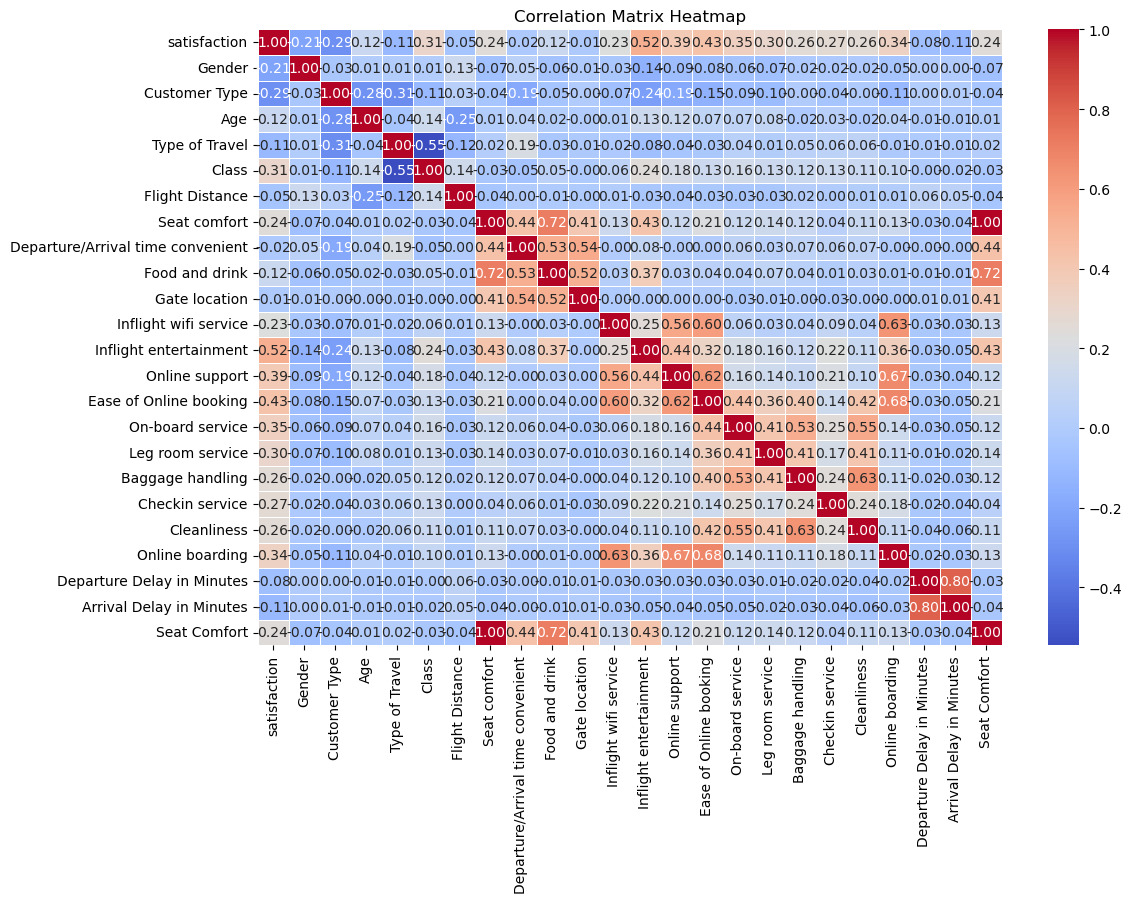

In [123]:
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Display the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


In [125]:
# Calculate the correlation matrix
corr_matrix = data.corr().abs()

# Create a set to store columns to drop
columns_to_drop = set()

# Iterate over the correlation matrix and drop one of the columns with high correlation
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] > 0.8:
            colname = corr_matrix.columns[i]
            columns_to_drop.add(colname)

# Drop the columns identified
data.drop(columns=columns_to_drop, inplace=True)

# Optionally, check which columns were dropped
print(f"Columns dropped due to high correlation: {columns_to_drop}")


Columns dropped due to high correlation: {'Arrival Delay in Minutes', 'Seat Comfort'}


# Applying Linear Regression for Model Traing 

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming 'data' is your DataFrame and 'target_column' is the column to predict

# Step 1: Split the dataset into features (X) and target (y)
X = data.drop('satisfaction', axis=1)  # Replace 'target_column' with your actual target column name
y = data['satisfaction']

# Step 2: Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
# 6a: Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 6b: Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 6c: Classification report (precision, recall, f1-score)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 83.78%
Confusion Matrix:
[[ 9631  2132]
 [ 2081 12128]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11763
           1       0.85      0.85      0.85     14209

    accuracy                           0.84     25972
   macro avg       0.84      0.84      0.84     25972
weighted avg       0.84      0.84      0.84     25972



# We have done with it, Thanks